In [108]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [109]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/heart%20disease%20classification%20dataset.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [110]:
df.shape

(303, 15)

In [111]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [113]:
df=df.fillna(0)

In [114]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
cp              int64
trestbps      float64
chol          float64
fbs             int64
restecg         int64
thalach       float64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target         object
dtype: object

In [115]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,129.973597,245.504950,0.148515,0.528053,147.392739,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,23.095668,53.719524,0.356198,0.525860,29.434756,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [116]:
df.describe().corr().T

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Unnamed: 0,1.000000,0.660881,0.529958,0.891682,0.859008,0.524213,0.527249,0.893151,0.525193,0.535681,0.527514,0.530732,0.529919
age,0.660881,1.000000,0.976180,0.854618,0.349921,0.975165,0.975822,0.818708,0.975311,0.977254,0.976050,0.976253,0.976844
cp,0.529958,0.976180,1.000000,0.735896,0.165310,0.999974,0.999992,0.691504,0.999982,0.999941,0.999985,0.999982,0.999972
trestbps,0.891682,0.854618,0.735896,1.000000,0.752226,0.732507,0.734558,0.994213,0.732908,0.739653,0.735418,0.736309,0.738050
chol,0.859008,0.349921,0.165310,0.752226,1.000000,0.159965,0.162911,0.757045,0.160210,0.173446,0.163170,0.167449,0.166321
fbs,0.524213,0.975165,0.999974,0.732507,0.159965,1.000000,0.999991,0.687869,0.999995,0.999878,0.999984,0.999957,0.999955
restecg,0.527249,0.975822,0.999992,0.734558,0.162911,0.999991,1.000000,0.690123,0.999992,0.999912,0.999991,0.999969,0.999973
thalach,0.893151,0.818708,0.691504,0.994213,0.757045,0.687869,0.690123,1.000000,0.688468,0.694699,0.691231,0.691427,0.694119
exang,0.525193,0.975311,0.999982,0.732908,0.160210,0.999995,0.999992,0.688468,1.000000,0.999875,0.999992,0.999955,0.999967
oldpeak,0.535681,0.977254,0.999941,0.739653,0.173446,0.999878,0.999912,0.694699,0.999875,1.000000,0.999886,0.999977,0.999881


In [117]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    151.000000
age            54.366337
cp              0.966997
trestbps      129.973597
chol          245.504950
fbs             0.148515
restecg         0.528053
thalach       147.392739
exang           0.326733
oldpeak         1.039604
slope           1.399340
ca              0.729373
thal            2.313531
dtype: float64

In [118]:
df.min()

Unnamed: 0         0
age               29
sex           female
cp                 0
trestbps         0.0
chol             0.0
fbs                0
restecg            0
thalach          0.0
exang              0
oldpeak          0.0
slope              0
ca                 0
thal               0
target            no
dtype: object

In [119]:
df.max()

Unnamed: 0      302
age              77
sex            male
cp                3
trestbps      200.0
chol          564.0
fbs               1
restecg           2
thalach       202.0
exang             1
oldpeak         6.2
slope             2
ca                4
thal              3
target          yes
dtype: object

In [120]:
df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes


In [121]:
le=LabelEncoder()

In [122]:
df['target']=le.fit_transform(df['target'])

In [123]:
df=df.drop(['Unnamed: 0'],axis='columns')

In [124]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1


In [125]:
x=df.drop(['sex'],axis='columns')

In [126]:
y=df.sex.values

In [127]:
xtrain,xtest,ytrain,ytest=train_test_split=train_test_split(x,y,test_size=0.3)

In [129]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pred_li=li.predict(xtest)
accu_li=accuracy_score(ytest,pred_li)*100
accu_li

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


71.42857142857143

In [130]:
print(classification_report(ytest,pred_li))

              precision    recall  f1-score   support

      female       0.78      0.23      0.35        31
        male       0.71      0.97      0.82        60

    accuracy                           0.71        91
   macro avg       0.74      0.60      0.58        91
weighted avg       0.73      0.71      0.66        91



In [131]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

76.92307692307693

In [133]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

      female       0.71      0.55      0.62        31
        male       0.79      0.88      0.83        60

    accuracy                           0.77        91
   macro avg       0.75      0.72      0.73        91
weighted avg       0.76      0.77      0.76        91



In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

71.42857142857143

In [136]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

      female       0.67      0.32      0.43        31
        male       0.72      0.92      0.81        60

    accuracy                           0.71        91
   macro avg       0.70      0.62      0.62        91
weighted avg       0.70      0.71      0.68        91



In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

74.72527472527473

In [140]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

      female       0.70      0.45      0.55        31
        male       0.76      0.90      0.82        60

    accuracy                           0.75        91
   macro avg       0.73      0.68      0.69        91
weighted avg       0.74      0.75      0.73        91



In [141]:
from sklearn.ensemble import BaggingClassifier

In [142]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

79.12087912087912

In [143]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

      female       0.77      0.55      0.64        31
        male       0.80      0.92      0.85        60

    accuracy                           0.79        91
   macro avg       0.78      0.73      0.75        91
weighted avg       0.79      0.79      0.78        91



In [144]:
from sklearn.naive_bayes import GaussianNB

In [145]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

69.23076923076923

In [146]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

      female       0.55      0.52      0.53        31
        male       0.76      0.78      0.77        60

    accuracy                           0.69        91
   macro avg       0.65      0.65      0.65        91
weighted avg       0.69      0.69      0.69        91



In [148]:
from sklearn.ensemble import ExtraTreesClassifier

In [149]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

76.92307692307693

In [150]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

      female       0.81      0.42      0.55        31
        male       0.76      0.95      0.84        60

    accuracy                           0.77        91
   macro avg       0.79      0.68      0.70        91
weighted avg       0.78      0.77      0.75        91



In [151]:
from sklearn.svm import SVC

In [152]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

65.93406593406593

In [153]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00        31
        male       0.66      1.00      0.79        60

    accuracy                           0.66        91
   macro avg       0.33      0.50      0.40        91
weighted avg       0.43      0.66      0.52        91



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

78.02197802197803

In [156]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

      female       0.92      0.39      0.55        31
        male       0.76      0.98      0.86        60

    accuracy                           0.78        91
   macro avg       0.84      0.69      0.70        91
weighted avg       0.81      0.78      0.75        91



In [160]:
from catboost import CatBoostClassifier

In [161]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.005312
0:	learn: 0.6911294	total: 287ms	remaining: 4m 46s
1:	learn: 0.6891822	total: 290ms	remaining: 2m 24s
2:	learn: 0.6865659	total: 293ms	remaining: 1m 37s
3:	learn: 0.6847622	total: 296ms	remaining: 1m 13s
4:	learn: 0.6827015	total: 299ms	remaining: 59.4s
5:	learn: 0.6802263	total: 301ms	remaining: 49.8s
6:	learn: 0.6782673	total: 303ms	remaining: 42.9s
7:	learn: 0.6762397	total: 305ms	remaining: 37.8s
8:	learn: 0.6738595	total: 307ms	remaining: 33.8s
9:	learn: 0.6720914	total: 310ms	remaining: 30.6s
10:	learn: 0.6695559	total: 312ms	remaining: 28.1s
11:	learn: 0.6677679	total: 315ms	remaining: 25.9s
12:	learn: 0.6656220	total: 317ms	remaining: 24.1s
13:	learn: 0.6633764	total: 319ms	remaining: 22.5s
14:	learn: 0.6613345	total: 321ms	remaining: 21.1s
15:	learn: 0.6590992	total: 324ms	remaining: 19.9s
16:	learn: 0.6572904	total: 326ms	remaining: 18.8s
17:	learn: 0.6553333	total: 328ms	remaining: 17.9s
18:	learn: 0.6544643	total: 330ms	remaining: 17s
19:	learn

232:	learn: 0.4375666	total: 769ms	remaining: 2.53s
233:	learn: 0.4370997	total: 771ms	remaining: 2.52s
234:	learn: 0.4362860	total: 773ms	remaining: 2.51s
235:	learn: 0.4358094	total: 774ms	remaining: 2.51s
236:	learn: 0.4350654	total: 776ms	remaining: 2.5s
237:	learn: 0.4347615	total: 778ms	remaining: 2.49s
238:	learn: 0.4340414	total: 780ms	remaining: 2.48s
239:	learn: 0.4334371	total: 782ms	remaining: 2.48s
240:	learn: 0.4326505	total: 784ms	remaining: 2.47s
241:	learn: 0.4320172	total: 787ms	remaining: 2.46s
242:	learn: 0.4312719	total: 788ms	remaining: 2.46s
243:	learn: 0.4309088	total: 791ms	remaining: 2.45s
244:	learn: 0.4305950	total: 793ms	remaining: 2.44s
245:	learn: 0.4299930	total: 795ms	remaining: 2.44s
246:	learn: 0.4295574	total: 797ms	remaining: 2.43s
247:	learn: 0.4289212	total: 799ms	remaining: 2.42s
248:	learn: 0.4284061	total: 801ms	remaining: 2.42s
249:	learn: 0.4278630	total: 803ms	remaining: 2.41s
250:	learn: 0.4271646	total: 805ms	remaining: 2.4s
251:	learn: 0.

470:	learn: 0.3325244	total: 1.25s	remaining: 1.4s
471:	learn: 0.3322543	total: 1.25s	remaining: 1.4s
472:	learn: 0.3319702	total: 1.25s	remaining: 1.39s
473:	learn: 0.3316420	total: 1.25s	remaining: 1.39s
474:	learn: 0.3314122	total: 1.25s	remaining: 1.39s
475:	learn: 0.3311726	total: 1.26s	remaining: 1.38s
476:	learn: 0.3308023	total: 1.26s	remaining: 1.38s
477:	learn: 0.3304364	total: 1.26s	remaining: 1.38s
478:	learn: 0.3299786	total: 1.26s	remaining: 1.37s
479:	learn: 0.3295528	total: 1.26s	remaining: 1.37s
480:	learn: 0.3290725	total: 1.27s	remaining: 1.37s
481:	learn: 0.3285897	total: 1.27s	remaining: 1.36s
482:	learn: 0.3279661	total: 1.27s	remaining: 1.36s
483:	learn: 0.3277703	total: 1.27s	remaining: 1.36s
484:	learn: 0.3276024	total: 1.28s	remaining: 1.35s
485:	learn: 0.3272951	total: 1.28s	remaining: 1.35s
486:	learn: 0.3269577	total: 1.28s	remaining: 1.35s
487:	learn: 0.3267910	total: 1.28s	remaining: 1.34s
488:	learn: 0.3263701	total: 1.28s	remaining: 1.34s
489:	learn: 0.

636:	learn: 0.2824811	total: 1.57s	remaining: 894ms
637:	learn: 0.2822217	total: 1.57s	remaining: 891ms
638:	learn: 0.2820053	total: 1.57s	remaining: 889ms
639:	learn: 0.2817058	total: 1.57s	remaining: 886ms
640:	learn: 0.2815764	total: 1.58s	remaining: 883ms
641:	learn: 0.2813521	total: 1.58s	remaining: 881ms
642:	learn: 0.2811043	total: 1.58s	remaining: 878ms
643:	learn: 0.2810192	total: 1.58s	remaining: 876ms
644:	learn: 0.2805284	total: 1.59s	remaining: 873ms
645:	learn: 0.2803859	total: 1.59s	remaining: 870ms
646:	learn: 0.2800560	total: 1.59s	remaining: 868ms
647:	learn: 0.2797462	total: 1.59s	remaining: 865ms
648:	learn: 0.2796455	total: 1.59s	remaining: 862ms
649:	learn: 0.2793745	total: 1.6s	remaining: 860ms
650:	learn: 0.2792878	total: 1.6s	remaining: 858ms
651:	learn: 0.2791262	total: 1.6s	remaining: 855ms
652:	learn: 0.2790028	total: 1.6s	remaining: 852ms
653:	learn: 0.2787765	total: 1.6s	remaining: 849ms
654:	learn: 0.2786293	total: 1.61s	remaining: 847ms
655:	learn: 0.278

796:	learn: 0.2433087	total: 1.89s	remaining: 481ms
797:	learn: 0.2431780	total: 1.89s	remaining: 478ms
798:	learn: 0.2429900	total: 1.89s	remaining: 477ms
799:	learn: 0.2426651	total: 1.9s	remaining: 474ms
800:	learn: 0.2426019	total: 1.9s	remaining: 472ms
801:	learn: 0.2424601	total: 1.9s	remaining: 469ms
802:	learn: 0.2422302	total: 1.9s	remaining: 467ms
803:	learn: 0.2418883	total: 1.91s	remaining: 465ms
804:	learn: 0.2415487	total: 1.91s	remaining: 462ms
805:	learn: 0.2410986	total: 1.91s	remaining: 460ms
806:	learn: 0.2408711	total: 1.91s	remaining: 457ms
807:	learn: 0.2406763	total: 1.92s	remaining: 455ms
808:	learn: 0.2401681	total: 1.92s	remaining: 453ms
809:	learn: 0.2398276	total: 1.92s	remaining: 451ms
810:	learn: 0.2395639	total: 1.92s	remaining: 448ms
811:	learn: 0.2393349	total: 1.93s	remaining: 446ms
812:	learn: 0.2390895	total: 1.93s	remaining: 444ms
813:	learn: 0.2388662	total: 1.93s	remaining: 442ms
814:	learn: 0.2386428	total: 1.94s	remaining: 439ms
815:	learn: 0.23

In [163]:
cat.score(xtest,ytest)*100

79.12087912087912

In [165]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_li,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,BaggingClassifier,79.120879
9,RandomForestClassifier,78.021978
1,DecisionTreeClassifier,76.923077
7,ExtraTreesClassifier,76.923077
3,AdaBoostClassifier,74.725275
6,AdaBoostClassifier,74.725275
0,LogisticRegression,71.428571
2,KNeighborsClassifier,71.428571
5,GaussianNB,69.230769
8,SVM,65.934066


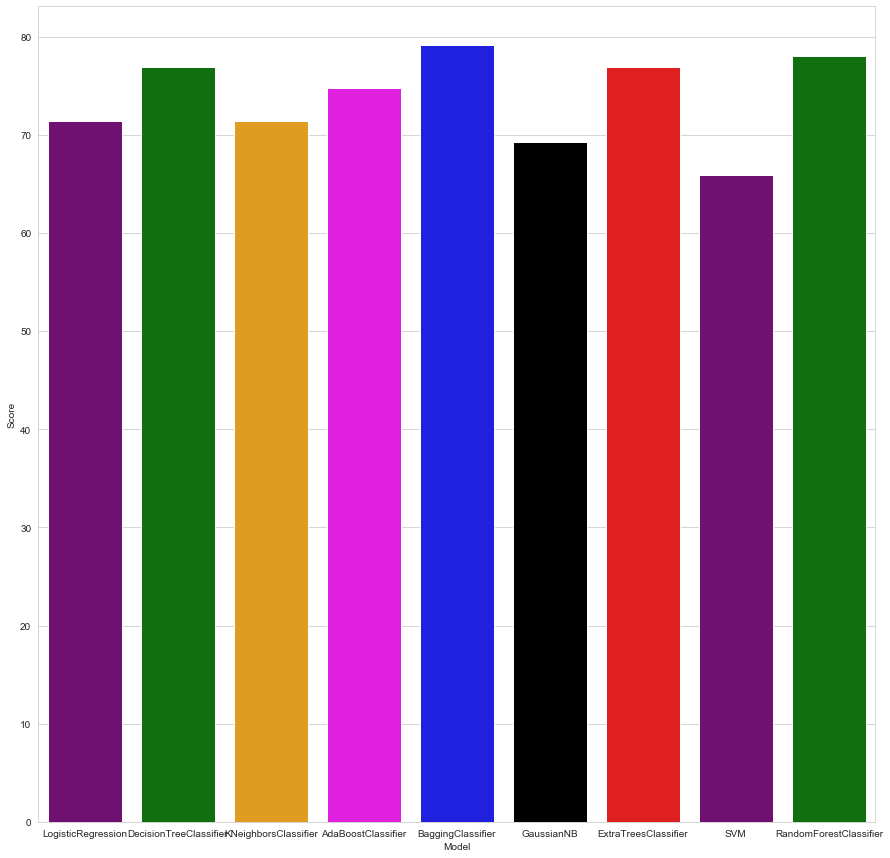

In [166]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [167]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1


In [168]:
import sklearn.cluster as cluster

In [169]:
kmns=cluster.KMeans(n_clusters=5)

In [170]:
kmns=kmns.fit(df[['age','chol']])

In [171]:
kmns.cluster_centers_

array([[ 55.64646465, 259.03030303],
       [ 52.98181818, 215.30909091],
       [ 62.6       , 438.2       ],
       [ 55.85714286, 311.17857143],
       [ 51.36363636, 164.93939394]])

In [172]:
df['Age by Chol']=kmns.labels_

In [173]:
from sklearn.cluster import KMeans 

In [175]:
k_range=range(1,15)
wss=[]

In [176]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','chol']])
    wss.append(km.inertia_)

In [177]:
wss

[896418.0792079209,
 401820.09808073525,
 259642.5100957491,
 181846.31714994583,
 135493.5764790765,
 106417.54240805507,
 83999.99155057326,
 63365.76321989085,
 52326.58107025403,
 45666.20335438885,
 41122.61705673017,
 36157.91759830703,
 33251.624603924014,
 30364.050189883274]

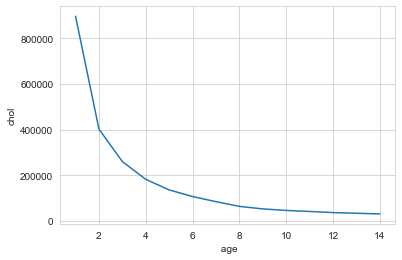

In [178]:
plt.xlabel(' age')
plt.ylabel('chol')
plt.plot(k_range,wss)

In [179]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age by Chol
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,1
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1


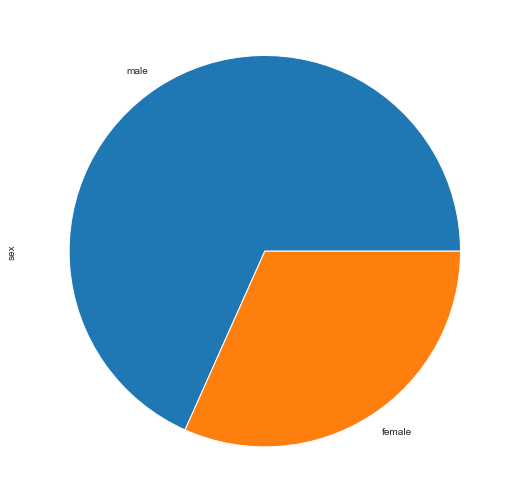

In [180]:
plt.figure(figsize = (15,9))
df.sex.value_counts().plot(kind='pie')

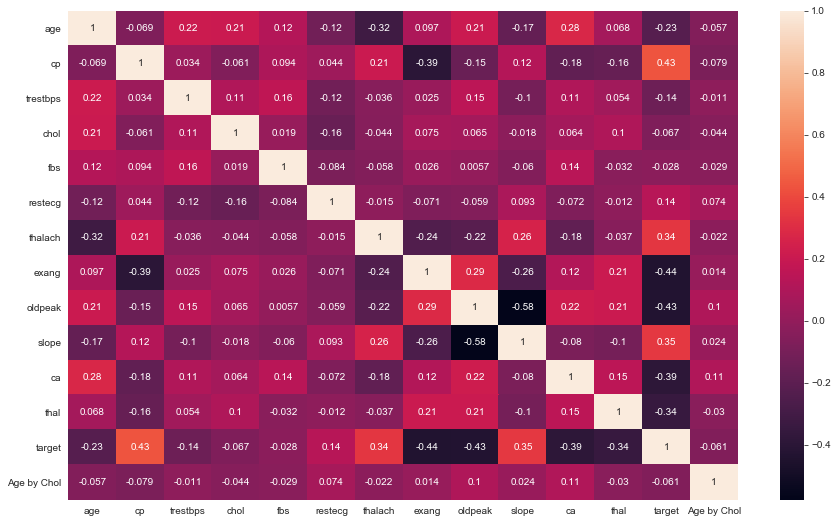

In [181]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

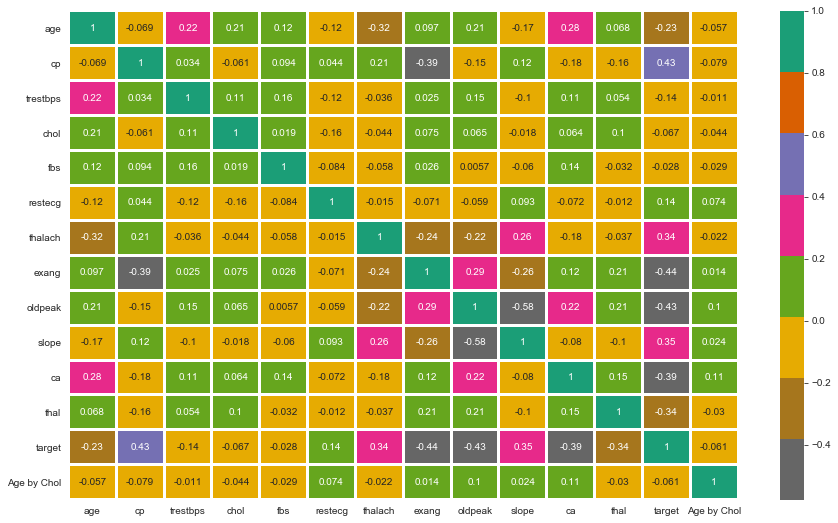

In [182]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

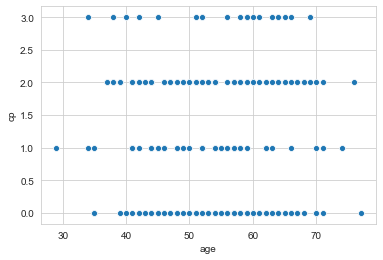

In [183]:
sns.scatterplot(x='age',y='cp',data=df)

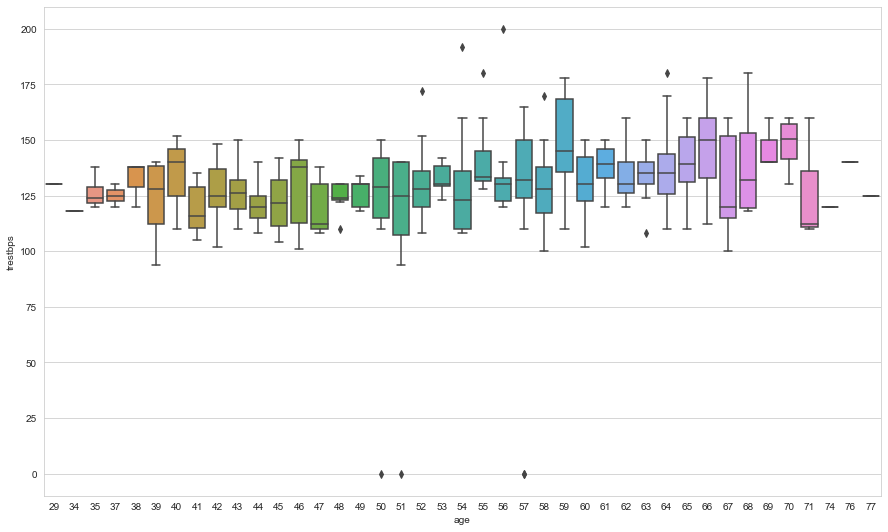

In [185]:
plt.figure(figsize=(15,9))
sns.boxplot(x='age',y='trestbps',data=df)

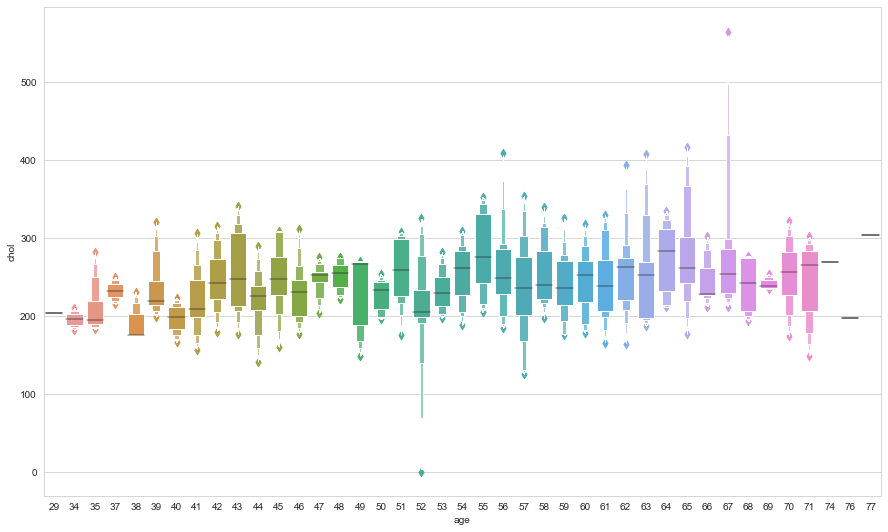

In [186]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='age',y='chol',data=df)

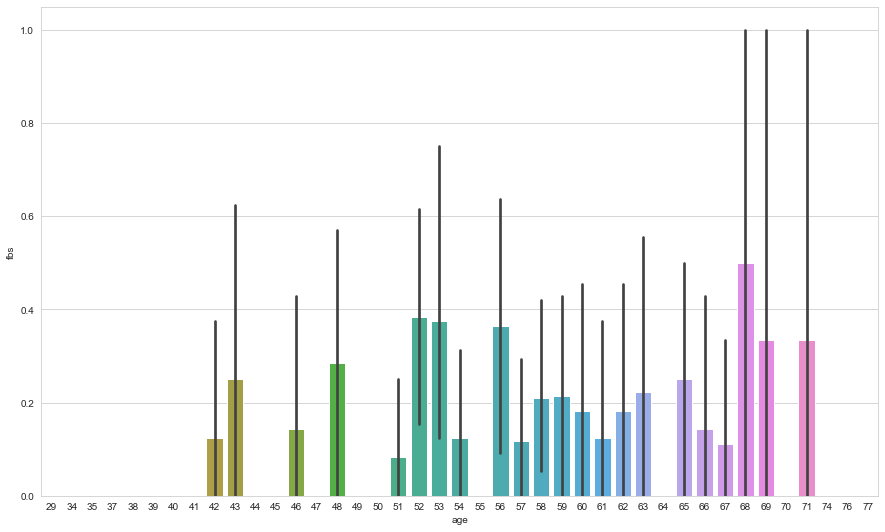

In [187]:
plt.figure(figsize=(15,9))
sns.barplot(x='age',y='fbs',data=df)

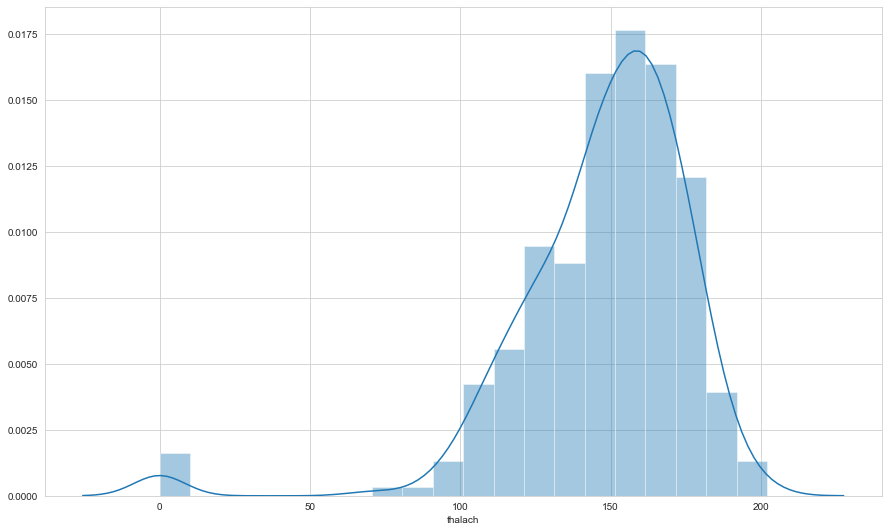

In [190]:
plt.figure(figsize=(15,9))
sns.distplot(df['thalach'])

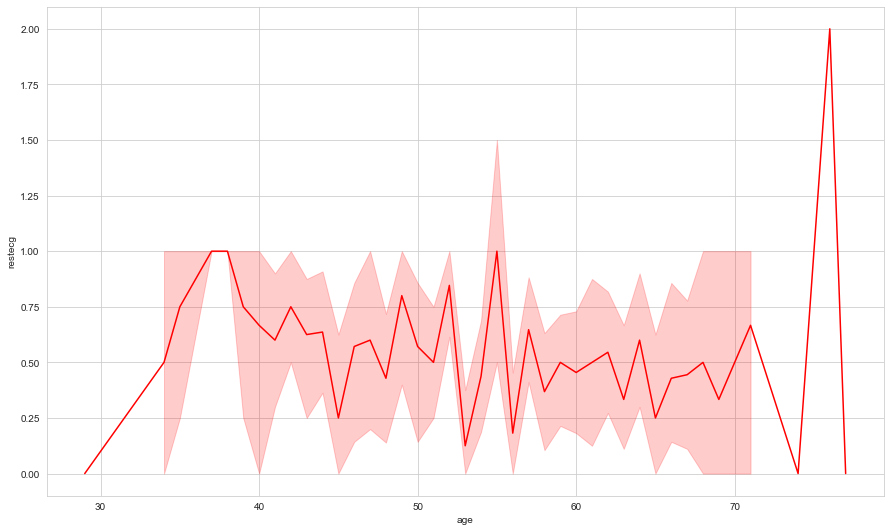

In [192]:
plt.figure(figsize=(15,9))
sns.lineplot(x='age',y='restecg',data=df,color='red')

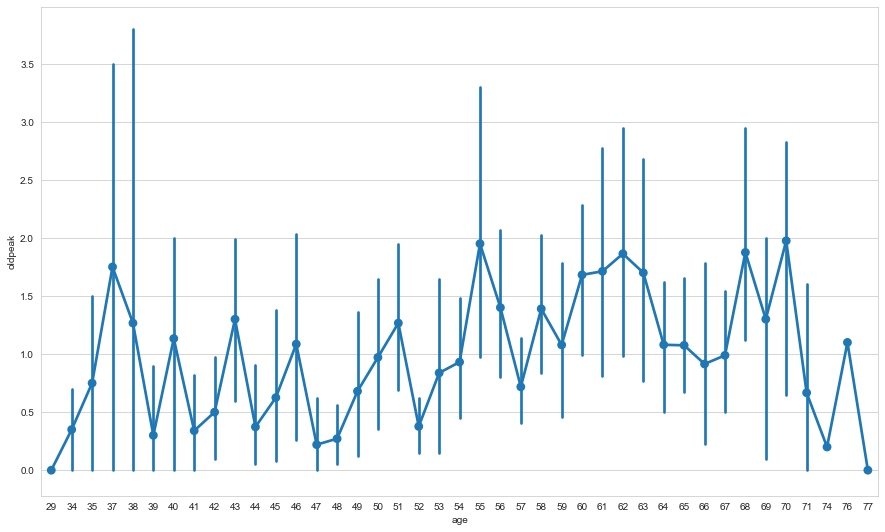

In [193]:
plt.figure(figsize=(15,9))
sns.pointplot(x='age',y='oldpeak',data=df)

<Figure size 1080x648 with 0 Axes>

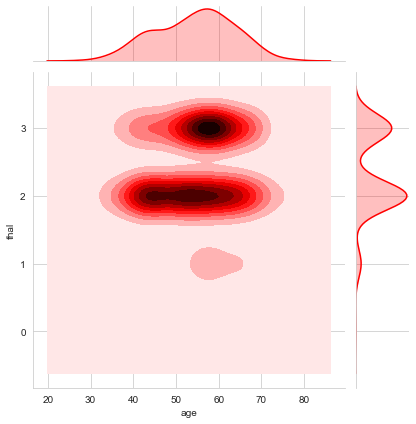

In [194]:
plt.figure(figsize=(15,9))
sns.jointplot(x='age',y='thal',data=df,kind='kde',color='red')

In [195]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age by Chol
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,0


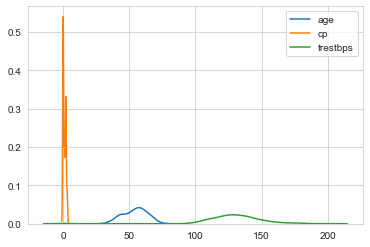

In [196]:
sns.kdeplot(df['age'])
sns.kdeplot(df['cp'])
sns.kdeplot(df['trestbps'])

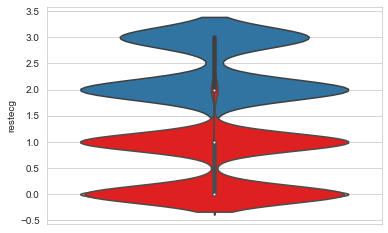

In [198]:
sns.violinplot(y="thal",data=df)
sns.violinplot(y="fbs",data=df,color='orange')
sns.violinplot(y="restecg",data=df,color='red')

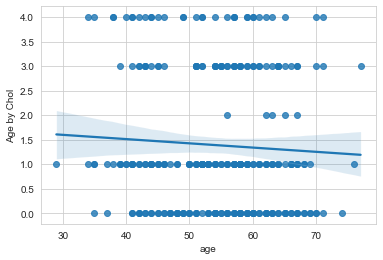

In [199]:
sns.regplot(x=df["age"], y=df["Age by Chol"], 
data=df)

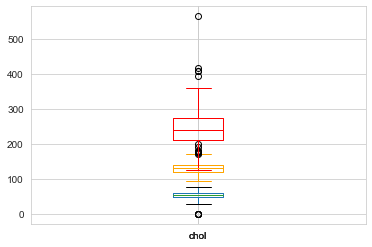

In [200]:
df.boxplot(column="age")
df.boxplot(column="trestbps",color='orange')
df.boxplot(column="chol",color='red')

In [201]:
import sweetviz as sv

In [202]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [203]:
from IPython.display import IFrame

In [204]:
IFrame(src='Analyze.html',width=1000,height=600)

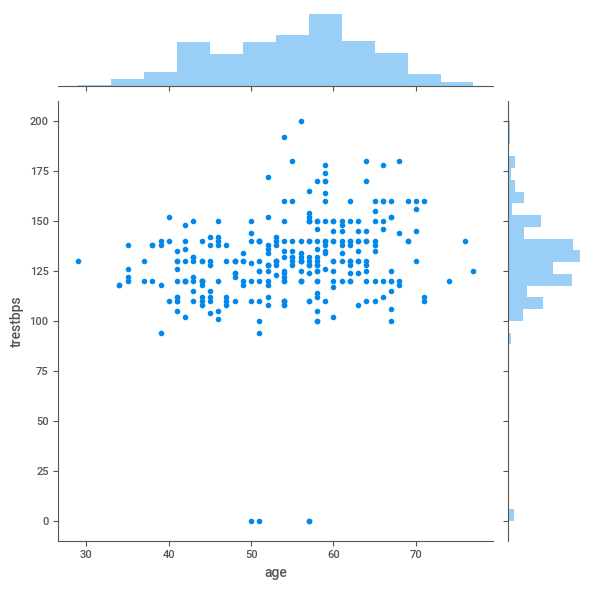

In [205]:
sns.jointplot(x="age",y="trestbps",data=df)

In [206]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [207]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age by Chol'],
      dtype='object')

In [209]:
man=MinMaxScaler()
feat=['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age by Chol']
df[feat]=man.fit_transform(df[feat])
df[feat]

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age by Chol
0,0.708333,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.00,0.333333,1.0,0.25
1,0.166667,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.00,0.666667,1.0,0.00
2,0.250000,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.00,0.666667,1.0,0.25
3,0.562500,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.00,0.666667,1.0,0.25
4,0.583333,0.000000,0.000,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.00,0.666667,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.000000,0.700,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00,1.000000,0.0,0.00
299,0.333333,1.000000,0.550,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00,1.000000,0.0,0.00
300,0.812500,0.000000,0.720,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50,1.000000,0.0,0.25
301,0.583333,0.000000,0.000,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25,1.000000,0.0,1.00


In [211]:
std=StandardScaler()
feat=['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age by Chol']
df[feat]=std.fit_transform(df[feat])
df[feat]

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age by Chol
0,0.952197,1.973123,0.651692,-0.233167,2.394438,-1.005832,0.088724,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529,-0.279137
1,-1.915313,1.002577,0.001145,0.083815,-0.417635,0.898962,1.347821,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529,-1.002030
2,-1.474158,0.032031,0.001145,-0.773901,-0.417635,-1.005832,0.837376,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529,-0.279137
3,0.180175,0.032031,-0.432553,-0.177229,-0.417635,0.898962,1.041554,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529,-0.279137
4,0.290464,-0.938515,-5.636927,2.022999,-0.417635,0.898962,0.531110,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529,1.166649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.434843,-0.083999,-0.417635,0.898962,-0.830076,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459,-1.002030
299,-1.033002,1.973123,-0.866251,0.344859,-0.417635,0.898962,-0.523809,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459,-1.002030
300,1.503641,-0.938515,0.608322,-0.979007,2.394438,0.898962,-0.217543,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459,-0.279137
301,0.290464,-0.938515,-5.636927,-2.135059,-0.417635,0.898962,-1.102313,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459,1.889542
